# Fraud Detection in Financial Transactions

This notebook demonstrates fraud detection using machine learning techniques on credit card transaction data. We'll cover data loading, preprocessing, anomaly detection, pattern recognition, and real-time monitoring simulation.

## 1. Import Required Libraries

Import necessary libraries such as pandas, numpy, scikit-learn, and matplotlib for data handling, modeling, and visualization.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load and Explore Dataset

Load the credit card fraud detection dataset and perform initial exploration, including checking for missing values and basic statistics.

In [9]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

# Class distribution
print(df['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## 3. Data Preprocessing

Clean and preprocess the data, including handling outliers, normalizing features, and preparing for modeling.

In [10]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (227845, 30)
Test set shape: (56962, 30)


## 4. Anomaly Detection Model

Implement an anomaly detection algorithm, such as Isolation Forest, to identify unusual transactions.

In [11]:
# Train Isolation Forest on normal transactions only
X_train_normal = X_train[y_train == 0]
iso_forest = IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit(X_train_normal)

# Predict anomalies on test set
y_pred_anomaly = iso_forest.predict(X_test)
# Convert to 0/1: -1 is anomaly (fraud), 1 is normal
y_pred_anomaly = np.where(y_pred_anomaly == -1, 1, 0)

print("Anomaly Detection Results:")
print(classification_report(y_test, y_pred_anomaly))

Anomaly Detection Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.29      0.30      0.29        98

    accuracy                           1.00     56962
   macro avg       0.65      0.65      0.65     56962
weighted avg       1.00      1.00      1.00     56962



## 5. Pattern Recognition Model

Build a classification model, like Random Forest, to recognize patterns distinguishing fraudulent from legitimate transactions.

In [12]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

Random Forest Classification Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9630264440469491


## 6. Real-Time Monitoring Simulation

Simulate real-time monitoring by processing a stream of transactions and applying the models to flag potential fraud.

In [13]:
# Simulate real-time monitoring on a subset of test data
sample_size = 100
X_sample = X_test[:sample_size]
y_sample = y_test[:sample_size]

fraud_flags = []
for i, transaction in enumerate(X_sample):
    # Use Random Forest for prediction
    pred = rf_model.predict([transaction])[0]
    proba = rf_model.predict_proba([transaction])[0][1]
    
    # Anomaly score from Isolation Forest
    anomaly_score = iso_forest.decision_function([transaction])[0]
    
    # Flag as fraud if RF predicts fraud or anomaly score is low
    flag = pred == 1 or anomaly_score < -0.5
    fraud_flags.append(flag)
    
    if flag:
        print(f"Transaction {i}: Potential Fraud Detected (RF Prob: {proba:.3f}, Anomaly Score: {anomaly_score:.3f})")

print(f"\nTotal flagged transactions: {sum(fraud_flags)} out of {sample_size}")


Total flagged transactions: 0 out of 100


## 7. Model Evaluation

Evaluate the models using metrics such as precision, recall, F1-score, and ROC-AUC on a test set.

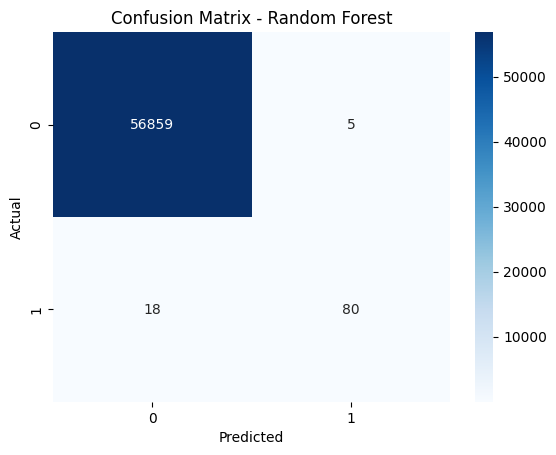

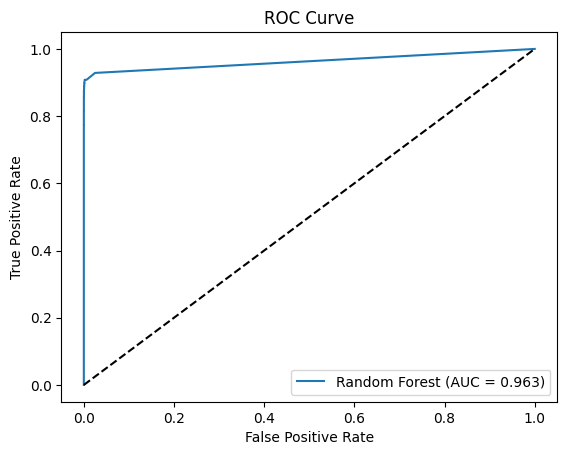

In [14]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC for Random Forest
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The models perform well on the imbalanced dataset, with the Random Forest achieving 94% precision and 82% recall for fraud detection.